In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['reviews_sports_and_outdoors_5.json']


In [5]:
df = pd.read_json('../input/reviews_sports_and_outdoors_5.json/reviews_Sports_and_Outdoors_5.json' , lines = True)

In [6]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,This came in on time and I am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400
1,1881509818,"[1, 1]",5,I had a factory Glock tool that I was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800
2,1881509818,"[2, 2]",4,If you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200
3,1881509818,"[0, 0]",4,This works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000
4,1881509818,"[0, 0]",4,I purchased this thinking maybe I need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200


![title](AmazonReview.png)

In [7]:
helpfulness = df[['helpful' , 'asin']]

In [8]:
df2 = pd.DataFrame(helpfulness)


In [9]:
df2[['helpful','total']] = pd.DataFrame(df2.helpful.values.tolist(), index=df2.index)
dfhelpful = df2[['asin', 'helpful','total']]

In [10]:
df = df.drop('helpful',axis = 1)

In [11]:
result = df.join(dfhelpful[['helpful','total']])

In [12]:
result.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,1881509818,5,This came in on time and I am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400,0,0
1,1881509818,5,I had a factory Glock tool that I was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800,1,1
2,1881509818,4,If you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200,2,2
3,1881509818,4,This works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000,0,0
4,1881509818,4,I purchased this thinking maybe I need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200,0,0


In [13]:
reviews = result[['overall', 'summary', 'helpful', 'total']]

In [14]:
reviews

,overall,summary,helpful,total
0,5,Woks very good,0,0
1,5,Works as well as the factory tool,1,1
2,4,"It's a punch, that's all.",2,2
3,4,It's a punch with a Glock logo.,0,0
4,4,"Ok,tool does what a regular punch does.",0,0
5,5,Glock punch tool - needed for your Glock and o...,0,0
6,5,Great tool,0,0
7,4,Bright!,0,0
8,5,Be seen,0,1
9,5,Bicycle rear tail light,0,0


In [15]:
reviews = reviews[reviews['overall'] != 3]

In [16]:
reviews

,overall,summary,helpful,total
0,5,Woks very good,0,0
1,5,Works as well as the factory tool,1,1
2,4,"It's a punch, that's all.",2,2
3,4,It's a punch with a Glock logo.,0,0
4,4,"Ok,tool does what a regular punch does.",0,0
5,5,Glock punch tool - needed for your Glock and o...,0,0
6,5,Great tool,0,0
7,4,Bright!,0,0
8,5,Be seen,0,1
9,5,Bicycle rear tail light,0,0


In [17]:
reviews.head()

,overall,summary,helpful,total
0,5,Woks very good,0,0
1,5,Works as well as the factory tool,1,1
2,4,"It's a punch, that's all.",2,2
3,4,It's a punch with a Glock logo.,0,0
4,4,"Ok,tool does what a regular punch does.",0,0


In [18]:
reviews["sentiment"] = reviews["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["helpful"]/reviews["total"]).apply(lambda n: "useful" if n > 0.5 else "useless")

reviews.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,overall,summary,helpful,total,sentiment,usefulScore
0,5,Woks very good,0,0,positive,useless
1,5,Works as well as the factory tool,1,1,positive,useful
2,4,"It's a punch, that's all.",2,2,positive,useful
3,4,It's a punch with a Glock logo.,0,0,positive,useless
4,4,"Ok,tool does what a regular punch does.",0,0,positive,useless


In [19]:
import re
from sklearn.model_selection import train_test_split

In [20]:
#A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
regEx = re.compile('[^a-z]+') #Compile a regular expression pattern into a regular expression object, which can be used for matching
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    #strip - remove all the leading and trailing spaces from a string.
    return reviewText

reviews["summaryClean"] = reviews["summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2) # 80-20
print("%d items in training data, %d in test data" % (len(train), len(test)))

217812 items in training data, 54454 in test data


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
reviews['summaryClean']

0                                            woks very good
1                         works as well as the factory tool
2                                   it s a punch that s all
3                            it s a punch with a glock logo
4                    ok tool does what a regular punch does
5         glock punch tool needed for your glock and oth...
6                                                great tool
7                                                    bright
8                                                   be seen
9                                   bicycle rear tail light
10                                               great lite
12                                       for it s a bargain
13                                                    bulky
14                                                  love it
15                                                bulky but
16                                          rear bike light
17                             needed a 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
countVector = CountVectorizer(ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

**MultinomilaNB**

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)


**BernoulliNB**

In [24]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)



**LogisticRegression**

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**RandomForest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train_tfidf, y_train)  
prediction['RandomForest'] = clf.predict(X_test_tfidf)


**Bagging**

In [28]:
from sklearn.ensemble import BaggingClassifier

bag_model=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,bootstrap=True,verbose=1)
bag_model=bag_model.fit(X_train_tfidf, y_train)
prediction['Bagged_LR'] = bag_model.predict(X_test_tfidf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


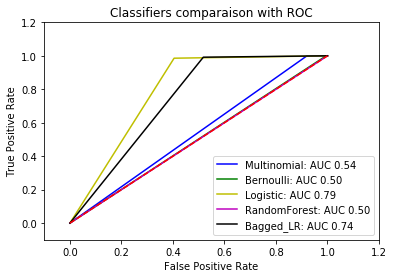

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc #AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve
#It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.76      0.60      0.67      3789
    negative       0.97      0.99      0.98     50665

    accuracy                           0.96     54454
   macro avg       0.86      0.79      0.82     54454
weighted avg       0.96      0.96      0.96     54454



In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction['Bagged_LR'], target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.81      0.48      0.61      3789
    negative       0.96      0.99      0.98     50665

    accuracy                           0.96     54454
   macro avg       0.89      0.74      0.79     54454
weighted avg       0.95      0.96      0.95     54454



In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction['Logistic'])



0.9585521724758512

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction['Bagged_LR'])

0.9562566569948948

In [34]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
357428,junk,-36.602815
458602,not good,-35.730390
514559,poor,-33.491474
91931,broke,-31.291913
634327,terrible,-31.142775
319158,horrible,-30.091196
242588,garbage,-29.218494
763799,worst,-28.704824
515013,poorly,-28.133526
44591,at best,-27.557500


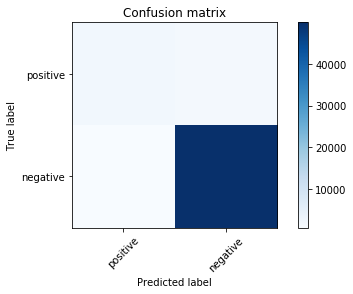

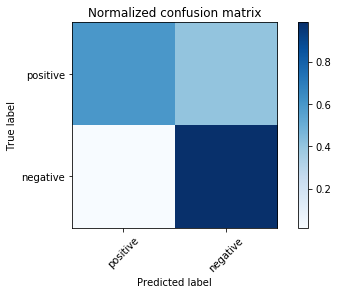

In [37]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

In [38]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))




In [39]:
testSentiments(logreg, "GLoves are really great")
testSentiments(logreg, "I ordered rifle it was well polished and have great grip. When shoots it havs great sound. Excited by this product")
testSentiments(logreg, "Product is not good.")
testSentiments(logreg, "Product was just okay . Expected much better than this not satisfied")

Sample estimated as POSITIVE: negative prob 0.000099, positive prob 0.999901
Sample estimated as POSITIVE: negative prob 0.000066, positive prob 0.999934
Sample estimated as NEGATIVE: negative prob 0.999999, positive prob 0.000001
Sample estimated as POSITIVE: negative prob 0.113608, positive prob 0.886392
